In [ ]:
# 生成1到10的整数
x <- 1:10
# 随机生成10个整数
set.seed(123)  # 设置随机种子以便结果可复现
y <- sample(1:10, 10, replace = TRUE)
# 计算x和y的相关系数
correlation <- cor(x, y, method = "pearson")
# 打印相关系数
print(correlation)
# 统计检验
t_result <- cor.test(x, y, method = "pearson")
# 打印检验结果
print(t_result)

# [1] 0.5553017

# 	Pearson's product-moment correlation

# data:  x and y
# t = 1.8886, df = 8, p-value = 0.09564
# alternative hypothesis: true correlation is not equal to 0
# 95 percent confidence interval:
#  -0.1142809  0.8779634
# sample estimates:
#       cor 
# 0.5553017

[1] 0.5553017

	Pearson's product-moment correlation

data:  x and y
t = 1.8886, df = 8, p-value = 0.09564
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1142809  0.8779634
sample estimates:
      cor 
0.5553017 



In [ ]:
# 测试spearman相关系数
spearman_correlation <- cor(x, y, method = "spearman")
# 打印Spearman相关系数
print(spearman_correlation)
# 统计检验
spearman_result <- cor.test(x, y, method = "spearman")
# 打印Spearman检验结果
print(spearman_result)

# Spearman's rank correlation rho

# data:  x and y
# S = 70.134, p-value = 0.08208
# alternative hypothesis: true rho is not equal to 0
# sample estimates:
#       rho 
# 0.5749477

[1] 0.5749477


Warning message in cor.test.default(x, y, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  x and y
S = 70.134, p-value = 0.08208
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5749477 



In [ ]:
# 测试Kendall's tau相关系数
# 生成测试数据


[1] 0.4600437


Warning message in cor.test.default(x, y, method = "kendall"):
"Cannot compute exact p-value with ties"



	Kendall's rank correlation tau

data:  x and y
z = 1.8107, p-value = 0.07018
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4600437 



In [1]:
# 设置随机种子以保证结果可复现
set.seed(42)

# 1. 创建一个模拟数据集
n_obs <- 100
df <- data.frame(
  day = 1:n_obs,
  ad_spend = runif(n_obs, 20, 120) # 广告花费
)

# 2. 制造不独立的数据
# 基础概率，只受广告花费影响
base_p <- 0.5 + (df$ad_spend - mean(df$ad_spend)) * 0.01

# 引入自相关：让今天的点击概率受昨天概率的影响
clicked_prob <- numeric(n_obs)
clicked_prob[1] <- base_p[1]

for (i in 2:n_obs) {
  # 滞后效应，如果昨天概率高，今天概率也倾向于高
  lag_effect <- 0.6 * (clicked_prob[i-1] - 0.5)
  clicked_prob[i] <- base_p[i] + lag_effect
}

# 将概率限制在(0,1)之间，并生成最终的点击结果（0或1）
clicked_prob <- pmin(pmax(clicked_prob, 0.01), 0.99)
df$clicked <- rbinom(n_obs, 1, clicked_prob)

# 3. 拟合逻辑回归模型
# glm是广义线性模型的函数
# family = binomial(link = "logit") 指定了这是一个逻辑回归
logit_model <- glm(clicked ~ ad_spend, data = df, family = binomial(link = "logit"))

# 查看模型摘要
summary(logit_model)


Call:
glm(formula = clicked ~ ad_spend, family = binomial(link = "logit"), 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.582947   0.652553  -3.958 7.55e-05 ***
ad_spend     0.034793   0.008288   4.198 2.69e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.59  on 99  degrees of freedom
Residual deviance: 116.69  on 98  degrees of freedom
AIC: 120.69

Number of Fisher Scoring iterations: 4


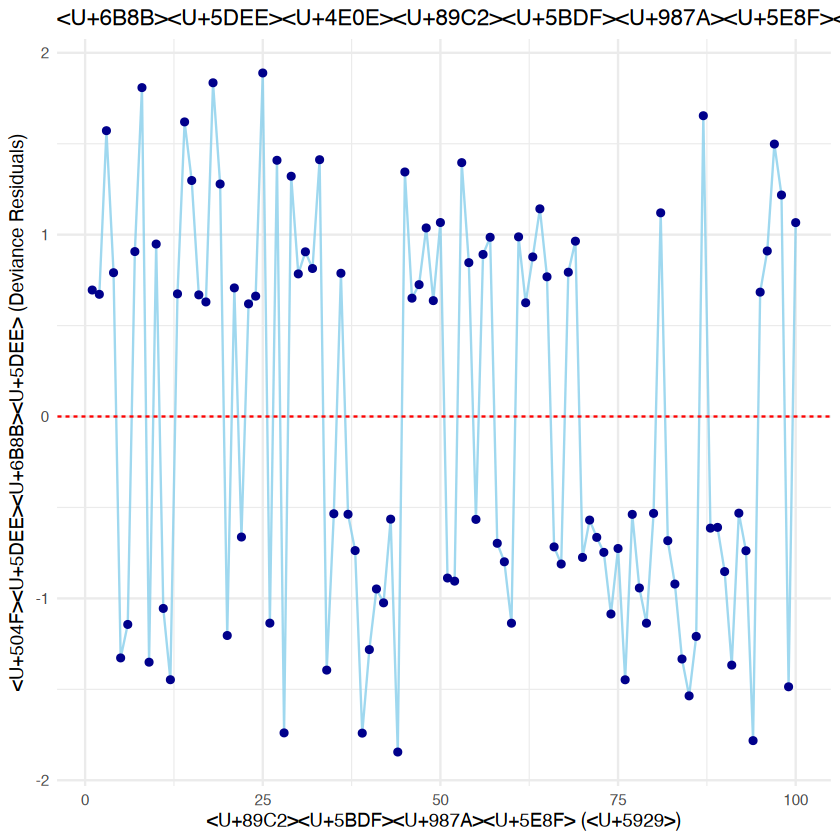

In [2]:
# 4. 提取偏差残差 (这是默认类型)
df$residuals <- residuals(logit_model, type = "deviance")

# 准备绘图库
library(ggplot2)

# 方法一：绘制 残差 vs. 观察顺序图
ggplot(df, aes(x = day, y = residuals)) +
  geom_line(color = "skyblue", alpha = 0.8) +
  geom_point(color = "darkblue") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "残差与观察顺序图 (Residuals vs. Observation Order)",
    x = "观察顺序 (天)",
    y = "偏差残差 (Deviance Residuals)"
  ) +
  theme_minimal()

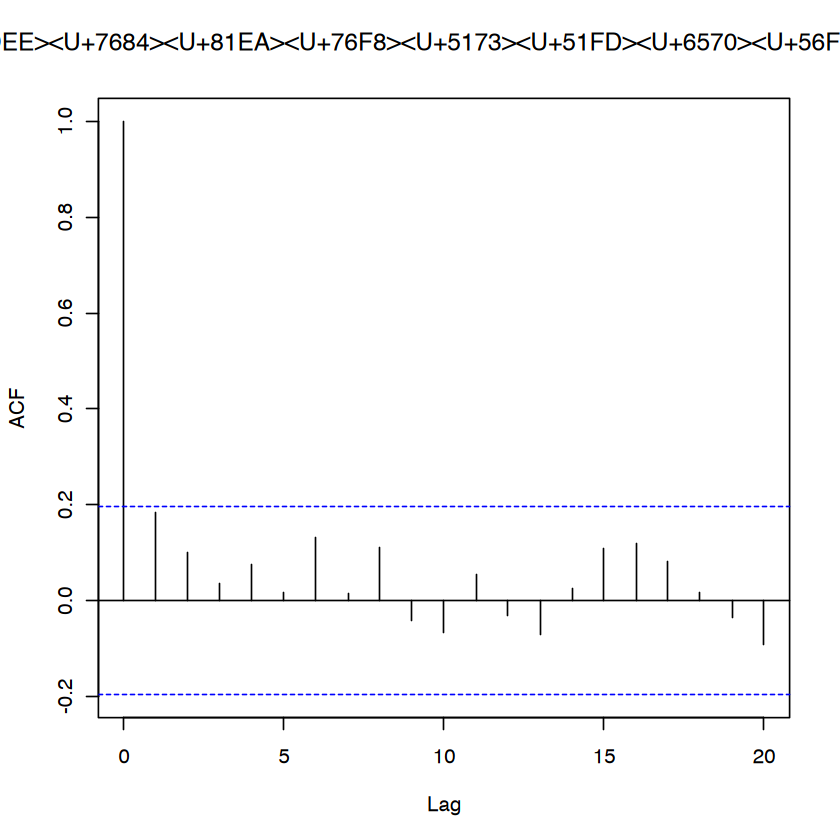

In [4]:
# 方法二：绘制残差的自相关函数(ACF)图
acf(df$residuals, main = "残差的自相关函数图 (ACF of Residuals)")

In [6]:
residuals(logit_model, type = "pearson")

1          2          3          4          5          6          7 
 0.5231453  0.5032658  1.5616798  0.6058383 -1.1887080 -0.9603092  0.7132951 
         8          9         10         11         12         13         14 
 2.0325101 -1.2206592  0.7535046 -0.8630914 -1.3599635  0.5053742  1.6473828 
        15         16         17         18         19         20         21 
 1.1494889  0.5006991  0.4684972  2.0941701  1.1243628 -1.0317305  0.5330437 
        22         23         24         25         26         27         28 
-0.4954756  0.4598849  0.4949369  2.2258339 -0.9521842  1.3030758 -1.8815973 
        29         30         31         32         33         34         35 
 1.1805428  0.6000101  0.7120463  0.6266256  1.3078340 -1.2819852 -0.3919288 
        36         37         38         39         40         41         42 
 0.6032423 -0.3942441 -0.5586174 -1.8844252 -1.1283261 -0.7533354 -0.8307262 
        43         44         45         46         47         48         49 
-0.4154358 -2.1171530  1.2122147  0.4856332  0.5483527  0.8438391  0.4744516 
        50         51         52         53         54         55         56 
 0.8754508 -0.6952400 -0.7115396  1.2844361  0.6560326 -0.4165253  0.6983073 
        57         58         59         60         61         62         63 
 0.7908247 -0.5243455 -0.6130291 -0.9525175  0.7931249  0.4647705  0.6853708 
        64         65         66         67         68         69         70 
 0.9589214  0.5858939 -0.5412218 -0.6240025  0.6082558  0.7692125 -0.5915075 
        71         72         73         74         75         76         77 
-0.4194720 -0.4970027 -0.5671624 -0.8962289 -0.5487460 -1.3605399 -0.3946219 
        78         79         80         81         82         83         84 
-0.7480213 -0.9525088 -0.3903109  0.9340344 -0.5123002 -0.7269037 -1.1967720 
        85         86         87         88         89         90         91 
-1.5009754 -1.0376960  1.7108365 -0.4552040 -0.4517578 -0.6619458 -1.2430187 
        92         93         94         95         96         97         98 
-0.3894077 -0.5595034 -1.9731011  0.5133735  0.7163966  1.4392413  1.0486623 
        99        100 
-1.4200749  0.8749620